In [1]:

import pandas as pd
import numpy as np


In [2]:
import matplotlib.pyplot as plt


In [3]:
import seaborn as sns

In [4]:
    reviews = pd.read_csv("D:\\Project\\NLP\\amazon_reviews.csv",error_bad_lines = False)
reviews.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_8424\1698185769.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  reviews = pd.read_csv("D:\\Project\\NLP\\amazon_reviews.csv",error_bad_lines = False)


,Unnamed: 0,User_name,Review,Rating1,Rating,Title
0,1,Ankit,Update after 1 month of use.There is crackling...,1.0 out of 5 stars,1,Stay Away
1,2,Arun Veer,It's mentioned in the features that bass editi...,1.0 out of 5 stars,1,No Quick Switch Button
2,3,satya,So coming from a quality wired earphones to th...,1.0 out of 5 stars,1,Great for calls and laptop to phone switch is ...
3,4,Prajwal G,After viewing too many reviews on youtube I th...,5.0 out of 5 stars,5,Not for me (too much bass)
4,5,Uddipan,quick feature doesn't work and even pairing wi...,1.0 out of 5 stars,1,Do not buy if you are an iPhone user


In [5]:
reviews.shape

(4450, 6)

In [6]:
# Check NA

reviews.isnull().sum()

Unnamed: 0    0
User_name     0
Review        2
Rating1       0
Rating        0
Title         0
dtype: int64

In [7]:
reviews.dropna(subset=["Review"],inplace=True)

In [8]:
reviews.isnull().sum()

Unnamed: 0    0
User_name     0
Review        0
Rating1       0
Rating        0
Title         0
dtype: int64

In [9]:
reviews["Review"].shape

(4448,)

In [10]:
# Drop columns
reviews = reviews.drop(columns = ["Unnamed: 0","Rating1"] ,axis = 1 )
reviews.head()

,User_name,Review,Rating,Title
0,Ankit,Update after 1 month of use.There is crackling...,1,Stay Away
1,Arun Veer,It's mentioned in the features that bass editi...,1,No Quick Switch Button
2,satya,So coming from a quality wired earphones to th...,1,Great for calls and laptop to phone switch is ...
3,Prajwal G,After viewing too many reviews on youtube I th...,5,Not for me (too much bass)
4,Uddipan,quick feature doesn't work and even pairing wi...,1,Do not buy if you are an iPhone user


In [11]:
reviews.describe()

,Rating
count,4448.000000
mean,3.434128
std,1.644522
min,1.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,5.000000


# Data Cleaning

In [12]:
import re #regular expression
import string

def clean_review(review):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    review = review.lower()              # sub = substract 
    review = re.sub('\[.*?\]', '', review)
    review = re.sub('[%s]' % re.escape(string.punctuation), '', review)
    review = re.sub('\w*\d\w*', '', review)
    review = re.sub("[0-9" "]+"," ",review)
    review = re.sub('[‘’“”…]', '', review)
    return review

clean = lambda x: clean_review(x)

In [13]:
reviews['Review'] = reviews.Review.apply(clean)
reviews['Review']

0       update after  month of usethere is crackling s...
1       its mentioned in the features that bass editio...
2       so coming from a quality wired earphones to th...
3       after viewing too many reviews on youtube i th...
4       quick feature doesnt work and even pairing wit...
                              ...                        
4445    mic has stopped working within  months of purc...
4446                        the media could not be loa...
4447                         google assistant not working
4448                                     awesome products
4449    i love the red and black of the reverb red it ...
Name: Review, Length: 4448, dtype: object

In [14]:
#Word frequency
freq = pd.Series(' '.join(reviews['Review']).split()).value_counts()[:20] # for top 20
freq

is         4929
the        4481
and        3471
i          2894
it         2809
to         2499
for        2274
quality    2257
this       2159
good       2053
not        2039
sound      1971
a          1770
product    1686
of         1677
in         1618
bass       1487
but        1480
one        1224
with       1202
dtype: int64

In [15]:
#removing stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
reviews['Review'] = reviews['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [16]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(reviews['Review']).split()).value_counts()[:20] # for top 20
freq_Sw

quality      2257
good         2053
sound        1971
product      1686
bass         1487
one          1224
battery       881
oneplus       722
also          661
best          601
working       575
noise         537
buy           498
earphones     494
use           479
using         447
plus          444
dont          438
like          437
time          406
dtype: int64

In [17]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [18]:
# Lemmatization

import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
reviews['Review'] = reviews['Review'].apply(lambda x: " ".join(lemmatizer.lemmatize(word) for word in x.split()))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
reviews.head(10)

,User_name,Review,Rating,Title
0,Ankit,update month usethere crackling sound backgrou...,1,Stay Away
1,Arun Veer,mentioned feature bass edition quick switch op...,1,No Quick Switch Button
2,satya,coming quality wired earphone neck band rip he...,1,Great for calls and laptop to phone switch is ...
3,Prajwal G,viewing many review youtube think op bullet wi...,5,Not for me (too much bass)
4,Uddipan,quick feature doesnt work even pairing new dev...,1,Do not buy if you are an iPhone user
5,Vishal,important read till endi gonna write pro con p...,5,Best purchase but read the review
6,Sudarshan chakraborty,medium could loaded purchased oneplus z ear ph...,1,"Please don't buy, one plus is fraud"
7,SUDHEER YARLAPATI,looking best wireless earphone go itoneplus bu...,5,Go for it if :
8,Adil Khan,connectivity good enough battery backup okay m...,1,Not Worth 1999.
9,Pankaj Vishal Singh,sound quality awesome want taking call please ...,1,For music awesome but for phone call worst


In [20]:
#Stemming

In [21]:
#from nltk.corpus import stopwords
#from nltk.stem import SnowballStemmer
#import nltk
#def Stemming(text):
   # stem=[]
   # stopword = stopwords.words('english')
  #  snowball_stemmer = SnowballStemmer('english')
   # word_tokens = nltk.word_tokenize(text)
  #  stemmed_word = [snowball_stemmer.stem(word) for word in word_tokens]
  #  stem=' '.join(stemmed_word)
  #  return stem

In [22]:
#reviews['Review'] = reviews['Review'].apply(Stemming)

In [23]:
#reviews

## Feature selection and Engineering

1. Count vectorize
2. TFIDF Vectorizer

In [24]:
# count vectoriser tells the frequency of a word.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9) # min_df = Min documents frequency
X = vectorizer.fit_transform(reviews['Review'])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
#print(word_freq_df.sort('occurrences',ascending = False).head())

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
word_freq_df.head(30)

,term,occurrences,frequency
0,aa,2,0.000025
1,aaaaaaa,1,0.000012
2,aac,15,0.000185
3,aacha,2,0.000025
4,aagya,1,0.000012
5,aaj,3,0.000037
6,aame,1,0.000012
7,aap,11,0.000136
8,aapka,2,0.000025
9,aapko,1,0.000012


In [26]:
#TFIDF - Term frequency inverse Document Frequencyt
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(reviews['Review'])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
df

,aac,aap,able,absolute,absolutely,acceptable,accessory,according,action,active,...,zero,zoom,अच,आव,एक,और,कर,नह,पर,रह
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# N-gram

In [28]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [29]:
top2_words = get_top_n2_words(reviews['Review'], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,sound quality,998
1,one plus,409
2,quality good,290
3,noise cancellation,283
4,battery backup,279


[Text(0, 0, 'sound quality'),
 Text(1, 0, 'one plus'),
 Text(2, 0, 'quality good'),
 Text(3, 0, 'noise cancellation'),
 Text(4, 0, 'battery backup'),
 Text(5, 0, 'bass edition'),
 Text(6, 0, 'battery life'),
 Text(7, 0, 'bass quality'),
 Text(8, 0, 'quick switch'),
 Text(9, 0, 'stopped working'),
 Text(10, 0, 'good product'),
 Text(11, 0, 'medium could'),
 Text(12, 0, 'could loaded'),
 Text(13, 0, 'build quality'),
 Text(14, 0, 'good sound'),
 Text(15, 0, 'also good'),
 Text(16, 0, 'dont buy'),
 Text(17, 0, 'price range'),
 Text(18, 0, 'bullet wireless'),
 Text(19, 0, 'good bass')]

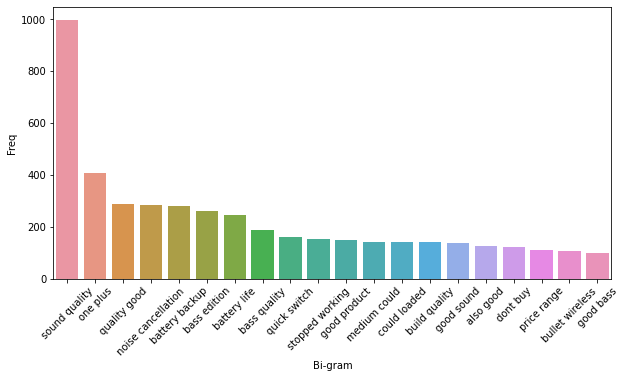

In [30]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [31]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [32]:
top3_words = get_top_n3_words(reviews['Review'], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]


In [33]:
top3_df

,Tri-gram,Freq
0,sound quality good,155
1,medium could loaded,142
2,good sound quality,94
3,sound quality bass,73
4,oneplus bullet wireless,49
...,...,...
195,sound quality goodbass,7
196,sound background come,6
197,background come call,6
198,though bass edition,6


[Text(0, 0, 'sound quality good'),
 Text(1, 0, 'medium could loaded'),
 Text(2, 0, 'good sound quality'),
 Text(3, 0, 'sound quality bass'),
 Text(4, 0, 'oneplus bullet wireless'),
 Text(5, 0, 'bullet wireless bass'),
 Text(6, 0, 'wireless bass edition'),
 Text(7, 0, 'quick switch button'),
 Text(8, 0, 'good noise cancellation'),
 Text(9, 0, 'one plus bullet'),
 Text(10, 0, 'quality also good'),
 Text(11, 0, 'good battery backup'),
 Text(12, 0, 'quick switch feature'),
 Text(13, 0, 'sound quality battery'),
 Text(14, 0, 'sound quality awesome'),
 Text(15, 0, 'sound quality also'),
 Text(16, 0, 'quality good bass'),
 Text(17, 0, 'stopped working month'),
 Text(18, 0, 'product one plus'),
 Text(19, 0, 'good battery life')]

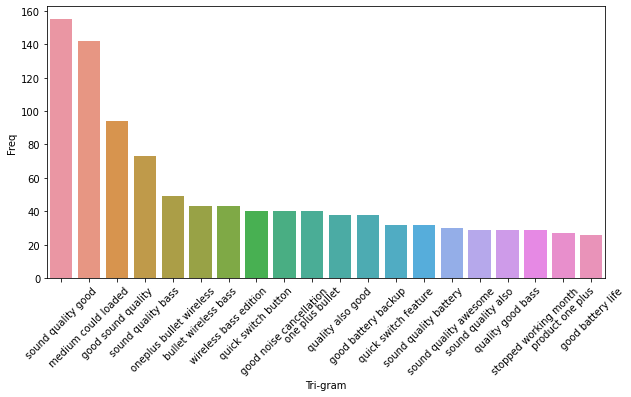

In [34]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

# WordCloud

In [35]:
string_Total = " ".join(reviews['Review'])

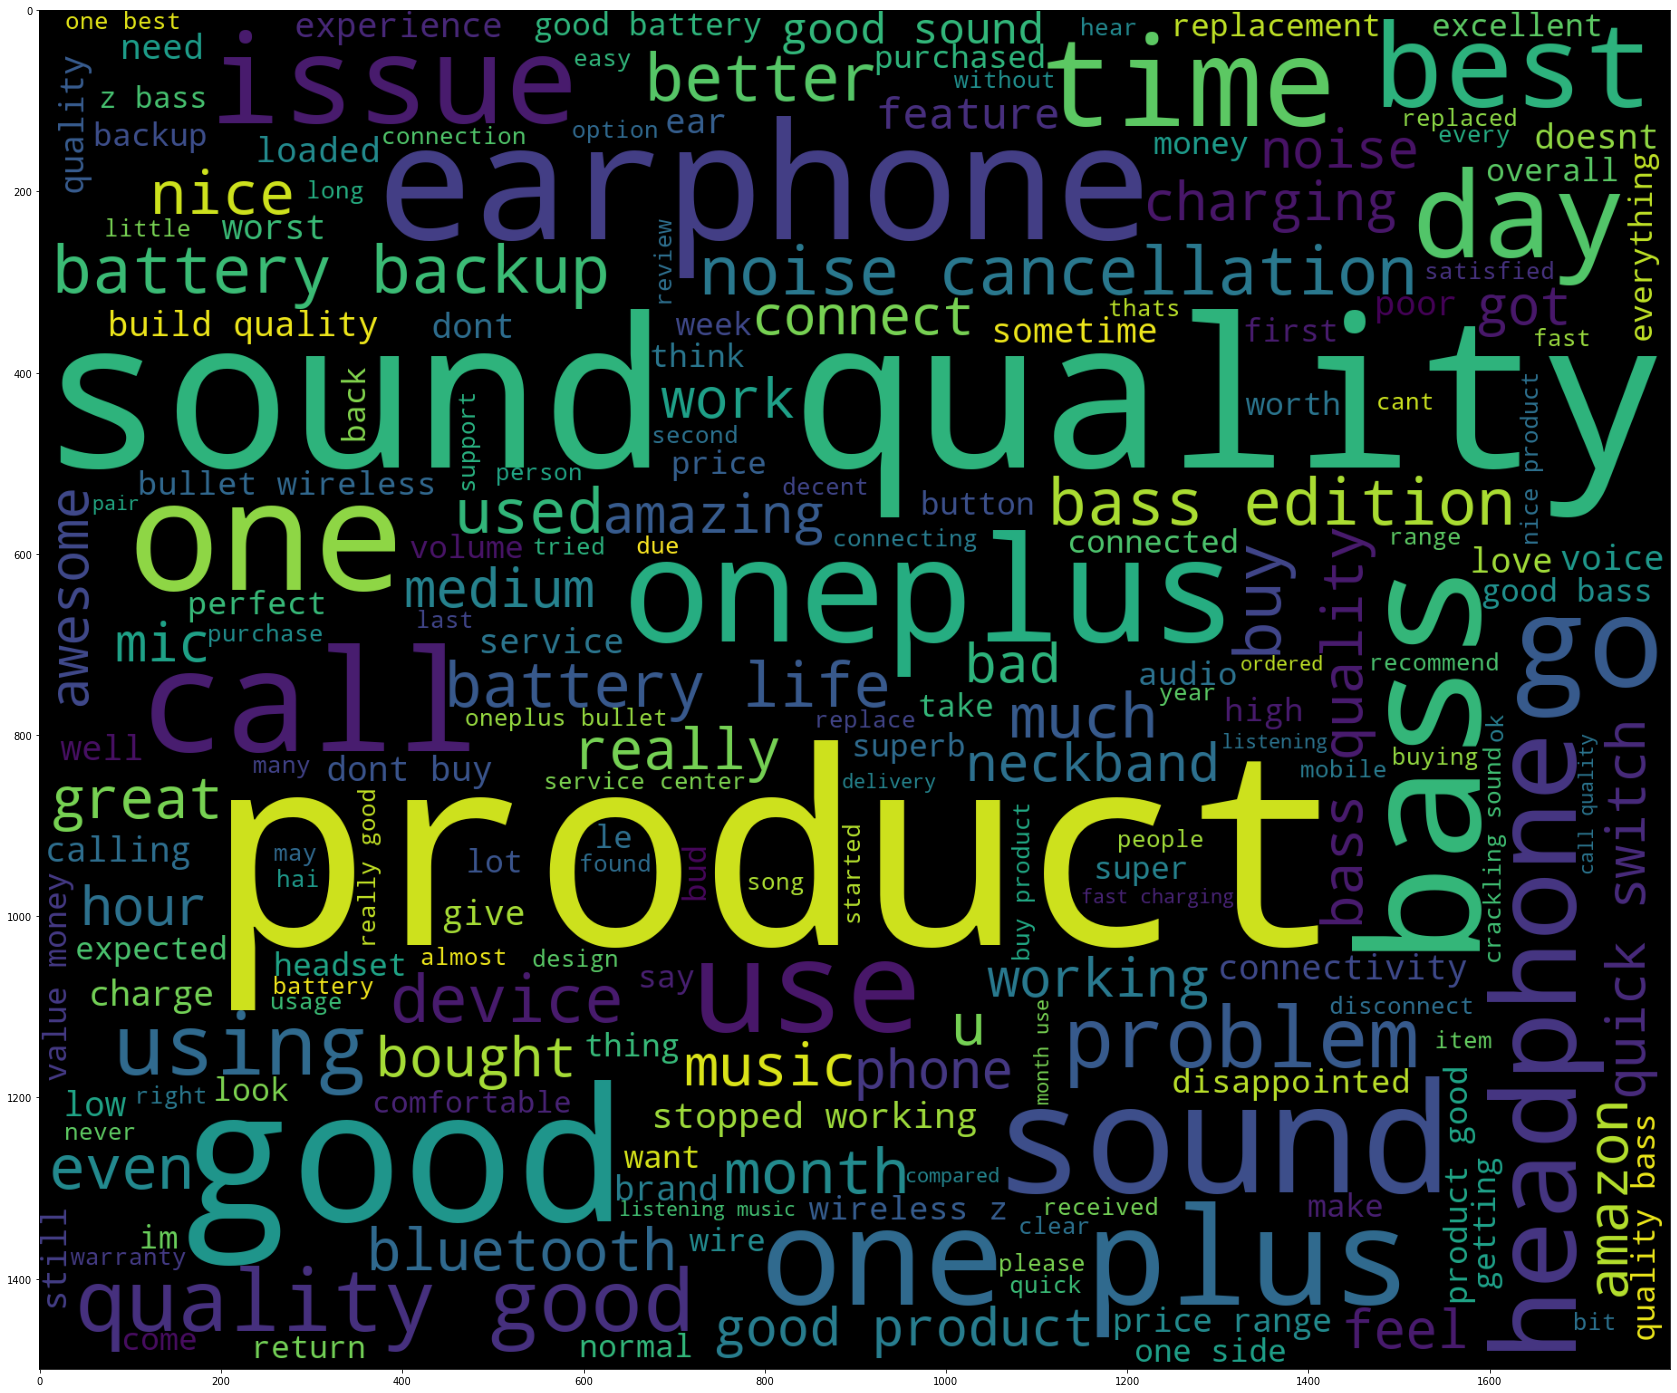

In [36]:
#wordcloud for entire corpus
from wordcloud import WordCloud
plt.figure(figsize=(35,25))
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw)


# Applying naive bayes for classification

In [37]:
reviews.head()

,User_name,Review,Rating,Title
0,Ankit,update month usethere crackling sound backgrou...,1,Stay Away
1,Arun Veer,mentioned feature bass edition quick switch op...,1,No Quick Switch Button
2,satya,coming quality wired earphone neck band rip he...,1,Great for calls and laptop to phone switch is ...
3,Prajwal G,viewing many review youtube think op bullet wi...,5,Not for me (too much bass)
4,Uddipan,quick feature doesnt work even pairing new dev...,1,Do not buy if you are an iPhone user


In [38]:
reviews1=reviews.drop(columns=['User_name','Title'],axis = 1)
reviews1

,Review,Rating
0,update month usethere crackling sound backgrou...,1
1,mentioned feature bass edition quick switch op...,1
2,coming quality wired earphone neck band rip he...,1
3,viewing many review youtube think op bullet wi...,5
4,quick feature doesnt work even pairing new dev...,1
...,...,...
4445,mic stopped working within month purchase need...,3
4446,medium could loaded best sound quality chargin...,5
4447,google assistant working,3
4448,awesome product,5


In [39]:
reviews1['Rating'] = reviews1['Rating'].replace({5.0: "positive",4.0:"positive",3.0:"neutral",2.0:"negative",1.0:"negative"})
#overall_view

In [40]:
reviews1

,Review,Rating
0,update month usethere crackling sound backgrou...,negative
1,mentioned feature bass edition quick switch op...,negative
2,coming quality wired earphone neck band rip he...,negative
3,viewing many review youtube think op bullet wi...,positive
4,quick feature doesnt work even pairing new dev...,negative
...,...,...
4445,mic stopped working within month purchase need...,neutral
4446,medium could loaded best sound quality chargin...,positive
4447,google assistant working,neutral
4448,awesome product,positive


In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
le = LabelEncoder()


In [43]:
reviews1['Rating1'] = le.fit_transform(reviews1['Rating'])

In [44]:
reviews1

,Review,Rating,Rating1
0,update month usethere crackling sound backgrou...,negative,0
1,mentioned feature bass edition quick switch op...,negative,0
2,coming quality wired earphone neck band rip he...,negative,0
3,viewing many review youtube think op bullet wi...,positive,2
4,quick feature doesnt work even pairing new dev...,negative,0
...,...,...,...
4445,mic stopped working within month purchase need...,neutral,1
4446,medium could loaded best sound quality chargin...,positive,2
4447,google assistant working,neutral,1
4448,awesome product,positive,2


In [45]:
# Negative = 0 , Neutral = 1 ,Positive = 2

# Data Spliting

In [46]:
def split_into_words(i):
    return (i.split(" "))

In [47]:
from sklearn.model_selection import train_test_split

review_train,review_test = train_test_split(reviews1,test_size=0.3)

In [48]:
review_test

,Review,Rating,Rating1
2255,bass edition title doesnt suit particular prod...,positive,2
3202,five month take headset working friend headset...,negative,0
438,lot research doubt bought like wishband proble...,positive,2
4014,worst earphone stopped working without reason ...,negative,0
1729,brought im facing little voice break issuegood...,neutral,1
...,...,...,...
4371,ride byk quality sound calling outside distrib...,positive,2
1844,lost magnetic power week sound quality much go...,negative,0
2354,product charge hour uncharge charge return cha...,negative,0
974,superb sound base quality also battery backup ...,positive,2


In [49]:
# Preparing Review texts into word count matrix format 
reviews_bow = CountVectorizer(analyzer=split_into_words).fit(reviews1.Review)

# ["mailing","body","texting"]
# ["mailing","awesome","good"]

# ["mailing","body","texting","good","awesome"]



#        "mailing" "body" "texting" "good" "awesome"
#  0          1        1       1        0       0
 
#  1          1        0        0       1       1  

In [50]:
# For all reviews  ---> Document terms matrix

all_reviews_matrix = reviews_bow.transform(reviews1.Review)
all_reviews_matrix.shape 

(4448, 9292)

In [51]:
all_reviews_matrix

<4448x9292 sparse matrix of type '<class 'numpy.int64'>'
	with 73270 stored elements in Compressed Sparse Row format>

In [52]:
# For training reviews
train_reviews_matrix = reviews_bow.transform(review_train.Review)
train_reviews_matrix.shape



(3113, 9292)

In [53]:
train_reviews_matrix

<3113x9292 sparse matrix of type '<class 'numpy.int64'>'
	with 51718 stored elements in Compressed Sparse Row format>

In [54]:
# For testing reviews
test_reviews_matrix = reviews_bow.transform(review_test.Review)
test_reviews_matrix.shape

(1335, 9292)

In [55]:
####### Without TFIDF matrices ########################
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

classifier_mb = MB()
classifier_mb.fit(train_reviews_matrix,review_train.Rating1)




MultinomialNB()


### Multinomial Naive Bayes

In [56]:
train_pred_m = classifier_mb.predict(train_reviews_matrix)
accuracy_train_m = np.mean(train_pred_m==review_train.Rating1) 
print("Training accuracy : ", accuracy_train_m )

Training accuracy :  0.847414070028911


In [57]:
test_pred_m = classifier_mb.predict(test_reviews_matrix)
accuracy_test_m = np.mean(test_pred_m==review_test.Rating1) 

In [58]:
print("Test accuracy : \n" ,accuracy_test_m )


Test accuracy : 
 0.7797752808988764


### Gaussian Naive Bayes

In [59]:
 
classifier_gb = GB()
classifier_gb.fit(train_reviews_matrix.toarray(),review_train.Rating1.values) # we need to convert tfidf into array format which is compatible for gaussian naive bayes




GaussianNB()

In [60]:
classifier_gb.classes_

array([0, 1, 2])

In [61]:
train_pred_g = classifier_gb.predict(train_reviews_matrix.toarray())
accuracy_train_g = np.mean(train_pred_g==review_train.Rating1) 

In [62]:
print( " Training accuracy :",accuracy_train_g) # 75%

 Training accuracy : 0.7433344041117893


In [63]:
test_pred_g = classifier_gb.predict(test_reviews_matrix.toarray())
accuracy_test_g = np.mean(test_pred_g==review_test.Rating1)

In [64]:
print("Test accuracy :" , accuracy_test_g) # 40% # underfitting


Test accuracy : 0.39176029962546816


# Using TFIDF

In [65]:
from sklearn.feature_extraction.text import TfidfTransformer

# Learning Term weighting and normalizing on entire Reviews
tfidf_transformer = TfidfTransformer().fit(all_reviews_matrix)



In [66]:
# Preparing TFIDF for train reviews
train_tfidf = tfidf_transformer.transform(train_reviews_matrix)
train_tfidf.shape

(3113, 9292)

In [67]:
train_tfidf

<3113x9292 sparse matrix of type '<class 'numpy.float64'>'
	with 51718 stored elements in Compressed Sparse Row format>

In [68]:
pd.DataFrame(train_tfidf.toarray())

,0,1,2,3,4,5,6,7,8,9,...,9282,9283,9284,9285,9286,9287,9288,9289,9290,9291
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
# Preparing TFIDF for test reviews
test_tfidf = tfidf_transformer.transform(test_reviews_matrix)

test_tfidf.shape 

(1335, 9292)

# naive bayes

In [70]:
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train_tfidf,review_train.Rating1)
train_pred_m = classifier_mb.predict(train_tfidf)
accuracy_train_m = np.mean(train_pred_m==review_train.Rating1) 
print("Training accuracy :" ,accuracy_train_m)


Training accuracy : 0.7982653389013813


In [71]:
test_pred_m = classifier_mb.predict(test_tfidf)
accuracy_test_m = np.mean(test_pred_m==review_test.Rating1) 

In [72]:
print("Test accuracy :",accuracy_test_m)

Test accuracy : 0.753558052434457


In [73]:
from sklearn.metrics import confusion_matrix

In [74]:
cm = confusion_matrix(review_test.Rating1 ,test_pred_m)
cm

array([[245,   0, 166],
       [ 32,   0, 103],
       [ 28,   0, 761]], dtype=int64)

<AxesSubplot:>

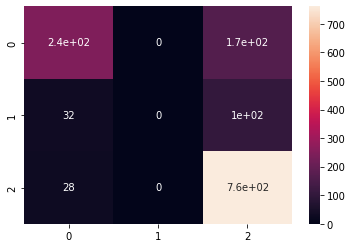

In [75]:
sns.heatmap(cm ,annot=True)

In [76]:
# Gaussian Naive Bayes 
classifier_gb = GB()
classifier_gb.fit(train_tfidf.toarray(),review_train.Rating1.values) # we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_g = classifier_gb.predict(train_tfidf.toarray())
accuracy_train_g = np.mean(train_pred_g==review_train.Rating1) 


In [77]:
accuracy_train_g

0.7459042724060392

In [78]:
test_pred_g = classifier_gb.predict(test_tfidf.toarray())
accuracy_test_g = np.mean(test_pred_g==review_test.Rating1) #
accuracy_test_g

0.40299625468164796

# Descision Tree 

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
dc =DecisionTreeClassifier(criterion="entropy" ,max_depth=5)

In [81]:
model = dc.fit(train_tfidf,review_train.Rating1)


In [82]:
train_pred = model.predict(train_tfidf)
accuracy_train = np.mean(train_pred==review_train.Rating1) 
print("Train accuracy :" ,accuracy_train)


Train accuracy : 0.6810150979762287


In [83]:
test_pred = model.predict(test_tfidf)
accuracy_test = np.mean(test_pred==review_test.Rating1) 

In [84]:
test_pred.shape

(1335,)

In [85]:
print("Test accuracy :" ,accuracy_test)

Test accuracy : 0.6576779026217229


# Random Forest

In [86]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

In [87]:
num_trees = 250
max_features = 5
model_rf = RandomForestClassifier(n_estimators=num_trees , max_features=max_features)
model_rf.fit(train_tfidf,review_train.Rating1)

RandomForestClassifier(max_features=5, n_estimators=250)

In [88]:
# Train
train_pred_rf = model_rf.predict(train_tfidf)
accuracy_train_rf = np.mean(train_pred_rf==review_train.Rating1) 
print("train accuracy :", accuracy_train_rf)

train accuracy : 0.9990362993896563


In [89]:
#test
test_pred_rf = model_rf.predict(test_tfidf)
accuracy_test_rf = np.mean(test_pred_rf==review_test.Rating1) 
print("Test accuracy :" ,accuracy_test_rf)

Test accuracy : 0.7730337078651686


# Grid search  for finding optimal number of Neighbors

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
n_neighbors = np.array(range(1,50))
param_grid = dict(n_neighbors = n_neighbors)

In [92]:
from sklearn.neighbors import KNeighborsClassifier
model_k = KNeighborsClassifier()
grid = GridSearchCV(estimator=model_k ,param_grid=param_grid)
grid.fit(train_tfidf,review_train.Rating1)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [93]:
print(grid.best_score_)
print(grid.best_params_)

0.7571567924109563
{'n_neighbors': 13}


# KNN

In [94]:
from sklearn.neighbors import KNeighborsClassifier

In [95]:
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(train_tfidf,review_train.Rating1)

KNeighborsClassifier(n_neighbors=24)

In [96]:
train_pred_knn = knn.predict(train_tfidf)
accuracy_train_knn = np.mean(train_pred_knn==review_train.Rating1) 
print("train accuracy :", accuracy_train_knn)

train accuracy : 0.7642145840025699


In [97]:
test_pred_knn = knn.predict(test_tfidf)
accuracy_test_knn = np.mean(test_pred_knn==review_test.Rating1) 
print("Test accuracy :" ,accuracy_test_knn)

Test accuracy : 0.7565543071161048


# SVM

In [98]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf' ,random_state = 0,gamma =0.5 , C = 2)
svm.fit(train_tfidf,review_train.Rating1)

SVC(C=2, gamma=0.5, random_state=0)

In [99]:
train_pred_svm = svm.predict(train_tfidf)
accuracy_train_svm = np.mean(train_pred_svm==review_train.Rating1) 
print("train accuracy :", accuracy_train_svm)

train accuracy : 0.9701252810793447


In [100]:
test_pred_svm = svm.predict(test_tfidf)
accuracy_test_svm = np.mean(test_pred_svm==review_test.Rating1) 
print("Test accuracy :" ,accuracy_test_svm)

Test accuracy : 0.7865168539325843


In [101]:
#svm.predict("Nice look and build quality with moderately fast everything such as refresh rate, display quality, sound, processing, gaming experience and many more I did not find any lagging or heating issue.And battery health I will not say great but I will take that Only cons I can say about it is camera.. sharpening picture a little much at day light and low light photo you have to compromise")

In [102]:
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(review_test.Rating1 ,test_pred_svm)
cm_svm

array([[321,   6,  84],
       [ 61,   5,  69],
       [ 62,   3, 724]], dtype=int64)

<AxesSubplot:>

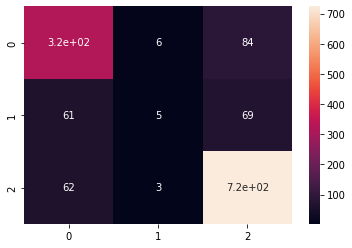

In [103]:
sns.heatmap(cm_svm ,annot=True)

In [104]:

svm_p = SVC(kernel = 'poly' ,random_state = 0,gamma =0.5 , C = 2)
svm_p.fit(train_tfidf,review_train.Rating1)

SVC(C=2, gamma=0.5, kernel='poly', random_state=0)

In [105]:
test_pred_svm_p = svm_p.predict(test_tfidf)
accuracy_test_svm_p = np.mean(test_pred_svm_p==review_test.Rating1) 
accuracy_test_svm_p


0.5910112359550562

In [106]:

svm_l = SVC(kernel = 'linear' ,random_state = 0,gamma =0.5 , C = 2)
svm_l.fit(train_tfidf,review_train.Rating1)

SVC(C=2, gamma=0.5, kernel='linear', random_state=0)

In [107]:
test_pred_svm_l = svm_l.predict(test_tfidf)
accuracy_test_svm_l = np.mean(test_pred_svm_l==review_test.Rating1) 
accuracy_test_svm_l

0.7715355805243446

# Making predective system

In [115]:
from copyreg import pickle
import joblib

In [116]:
model_filename = 'model.pkl'
joblib.dump (svm ,model_filename)

['model.pkl']